# Netflix Data : Cleaning, Analysis, & Visualization

# 1 Import Required Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Load the Dataset

In [4]:
# Load the Netflix Dataset
df = pd.read_csv("netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [5]:
# Dispaly the first 5 rows
print("First 5 rows:")
print(df.head())

First 5 rows:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2        

# 3 Explore the Dataset

In [6]:
# shape of the dataset
print(df.shape)

(8790, 10)


In [7]:
# columns names
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [8]:
# Data type of each column
print(df.dtypes)

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [9]:
# summery stastiscs
print(df.describe(include='all'))

       show_id   type   title   director        country date_added  \
count     8790   8790    8790       8790           8790       8790   
unique    8790      2    8787       4528             86       1713   
top      s6360  Movie  15-Aug  Not Given  United States   1/1/2020   
freq         1   6126       2       2588           3240        110   
mean       NaN    NaN     NaN        NaN            NaN        NaN   
std        NaN    NaN     NaN        NaN            NaN        NaN   
min        NaN    NaN     NaN        NaN            NaN        NaN   
25%        NaN    NaN     NaN        NaN            NaN        NaN   
50%        NaN    NaN     NaN        NaN            NaN        NaN   
75%        NaN    NaN     NaN        NaN            NaN        NaN   
max        NaN    NaN     NaN        NaN            NaN        NaN   

        release_year rating  duration                     listed_in  
count    8790.000000   8790      8790                          8790  
unique           Na

In [10]:
# check for missing values 
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [13]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# 4 Data Cleaning

In [14]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'date_added'to datetime format
if 'date_added'in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    
# fill missing values
if 'rating'in df.columns:
    df['rating'].fillna(df['rating'].mode()[0], inplace=True)
    
# strip extra whitespace from string columns
df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

# confirm cleaning
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


# 5 Exploratory Data Analysis

In [15]:
# count of each content type (Movie or TV show)
if 'type'in df.columns:
    print("\n content type counts:")
    print(df['type'].value_counts())


 content type counts:
Movie      6126
TV Show    2664
Name: type, dtype: int64


In [16]:
from collections import Counter 
if 'listed_in' in df.columns:
    genres = df['listed_in'].dropna().str.split(',')
    genre_list = sum(genres, [])  
    genre_counts = Counter(genre_list)  
    print("\nTop 10 genres:")
    for genre, count in genre_counts.most_common(10):
        print(f"{genre.strip()}: {count}")  


Top 10 genres:
International Movies: 2624
Dramas: 1599
Comedies: 1210
Action & Adventure: 859
Documentaries: 829
Dramas: 827
International TV Shows: 773
Independent Movies: 736
TV Dramas: 695
Romantic Movies: 613


In [17]:
# Distribution of release years
if 'release_year' in df.columns:
    print("\n🔹 Release year distribution:")
    print(df['release_year'].value_counts().sort_index())


🔹 Release year distribution:
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64


# 6 Visualization

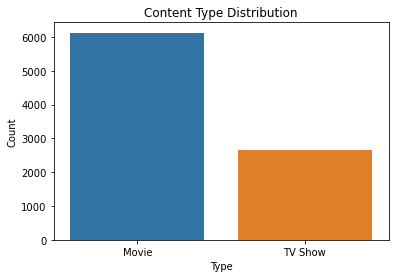

In [18]:
# plot content type distribution
if 'type' in df.columns:
    sns.countplot(data=df, x='type')
    plt.title('Content Type Distribution')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()

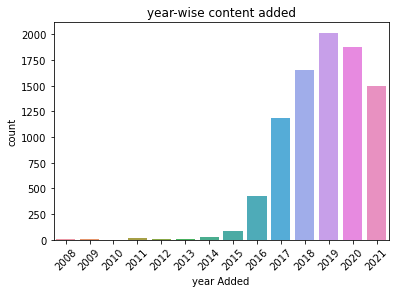

In [19]:
# Year-Wise content addition
if 'date_added'in df.columns:
    df['year_added'] = df['date_added'].dt.year
    sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
    plt.title('year-wise content added')
    plt.xticks(rotation=45)
    plt.xlabel('year Added')
    plt.ylabel('count')
    plt.show()
   

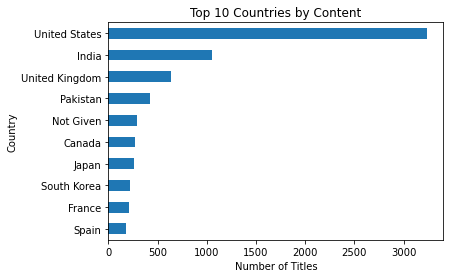

In [20]:
# Top 10 countries by number of titles
if 'country' in df.columns:
    country_data = df['country'].dropna().str.split(', ').explode()
    top_countries = country_data.value_counts().head(10)
    top_countries.plot(kind='barh', title='Top 10 Countries by Content')
    plt.xlabel('Number of Titles')
    plt.ylabel('Country')
    plt.gca().invert_yaxis()
    plt.show()

# 7 Conclusion
Netflix primarily features Dramas, International Movies, and Comedies, showing a strong focus on diverse and engaging storytelling. The platform also includes a mix of Documentaries and TV Dramas, appealing to a broad global audience.